# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 53.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [6]:
import pandas as pd

df = pd.read_csv("ncr_ride_bookings.csv")

# Keep only the columns you want
df = df[["Ride Distance", "Booking Value"]]

# Drop rows where these values are missing
df = df.dropna()

print(df.head())


   Ride Distance  Booking Value
1           5.73          237.0
2          13.58          627.0
3          34.02          416.0
4          48.21          737.0
5           4.85          316.0


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [ ]:
# predict Booking Value from Ride Distance
X = df[["Ride Distance"]] 
y = df["Booking Value"]  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  

print("R²:", r2)
print("RMSE:", rmse)


R²: -6.32425448592322e-05
RMSE: 396.9372713884362


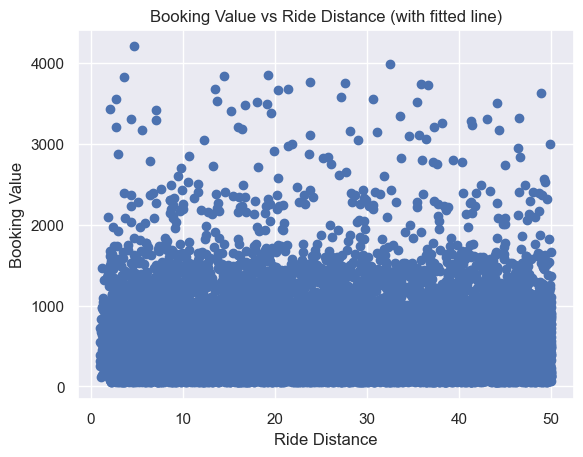

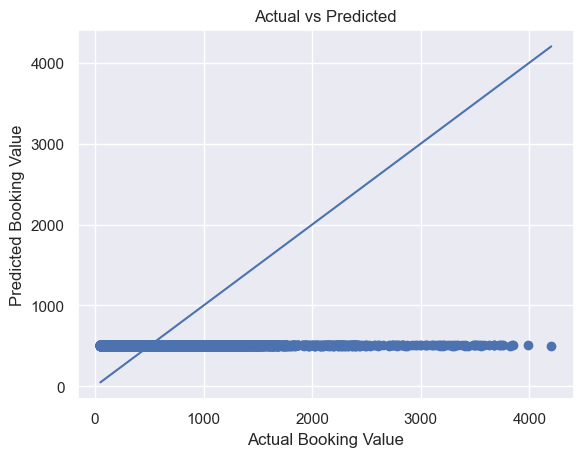

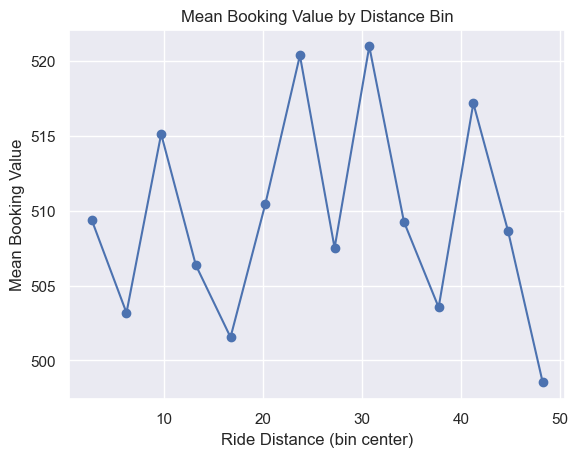

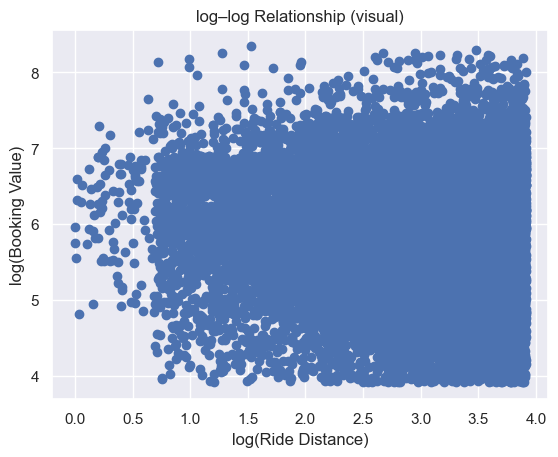

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Scatter of Ride Distance vs Booking Value + fitted line
plt.figure()
plt.scatter(X_test["Ride Distance"], y_test)
# regression line using model coef_
x_line = np.linspace(X_test["Ride Distance"].min(), X_test["Ride Distance"].max(), 200)
y_line = lr.intercept_ + lr.coef_[0] * x_line
plt.plot(x_line, y_line)
plt.xlabel("Ride Distance")
plt.ylabel("Booking Value")
plt.title("Booking Value vs Ride Distance (with fitted line)")
plt.show()

# 2) Actual vs Predicted (ideal 45° line)
plt.figure()
plt.scatter(y_test, y_pred)
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v])
plt.xlabel("Actual Booking Value")
plt.ylabel("Predicted Booking Value")
plt.title("Actual vs Predicted")
plt.show()

# 3) Distance-binned mean Booking Value (trend view without noise)
#    (simple equal-width bins)
bins = np.linspace(X_test["Ride Distance"].min(), X_test["Ride Distance"].max(), 15)
bin_ids = np.digitize(X_test["Ride Distance"], bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_means = [y_test[bin_ids == i].mean() for i in range(1, len(bins))]
plt.figure()
plt.plot(bin_centers, bin_means, marker="o")
plt.xlabel("Ride Distance (bin center)")
plt.ylabel("Mean Booking Value")
plt.title("Mean Booking Value by Distance Bin")
plt.show()

# 4) (Optional) Log–Log view (helps see proportional relationships)
#    Only run if values are positive.
if (X_test["Ride Distance"] > 0).all() and (y_test > 0).all():
    plt.figure()
    plt.scatter(np.log(X_test["Ride Distance"]), np.log(y_test))
    # fitted line in log space using same model is not exact; treat as visual only
    plt.xlabel("log(Ride Distance)")
    plt.ylabel("log(Booking Value)")
    plt.title("log–log Relationship (visual)")
    plt.show()


## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [ ]:
df['momentum_sq'] = df['momentum']**2
X2 = df[['mkt_excess','size','value','momentum','momentum_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = mean_squared_error(y_test, y_pred2, squared=False)
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

## 4) Interpretation (write your conclusions below)
- Linearity: Residuals vs fitted show [little/clear] curvature → linearity is [ok / somewhat violated].
- Homoscedasticity: Residual spread is [roughly constant / fans out] → [meets / violates] equal-variance.
- Normality: Histogram & QQ show residuals are [roughly normal / skewed or heavy-tailed].
- Independence: No obvious pattern → errors are [likely independent / may be time-dependent].
- Model to trust: [Baseline / Transformed]—because diagnostics improved (higher R², lower RMSE, better residual patterns).
- Next step: Add features (e.g., time-of-day, vehicle type) or try a log/squared term to address [nonlinearity / heteroscedasticity].